In [32]:
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv). 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
import wordcloud
import os # Good for navigating your computer's files 
import sys

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nltk.download('wordnet')
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
!python -m spacy download en_core_web_md
import en_core_web_md


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/seemavora/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/seemavora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [33]:
data_file = './yelp_final.csv'
yelp = pd.read_csv(data_file)
yelp.head()

,business_id,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [34]:
yelp.drop(labels = ['business_id', 'user_id'], inplace = True, axis = 1)
#pandas dataframe drop function, inplace: if true updates existing file, otherwise generates a copy, axis: (1 is columns, 0 is index)
yelp.head()

,stars,text,cool,useful,funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
3,5,General Manager Scott Petello is a good egg!!!...,0,0,0
4,5,Drop what you're doing and drive here. After I...,7,7,4


In [35]:
num_stars = 1
for t in yelp[yelp['stars'] == num_stars]['text'].head(20).values:
    print(t)

U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!
Disgusting!  Had a Groupon so my daughter and I tried it out.  Very outdated and gaudy 80's style interior made me feel like I was in an episode of Sopranos.  The food itself was pretty bad.  We ordered pretty simple dishes but they just had no flavor at all!  After trying it out I'm positive all the good reviews on here are employees or owners creating them.
I've eaten here many times, but none as bad

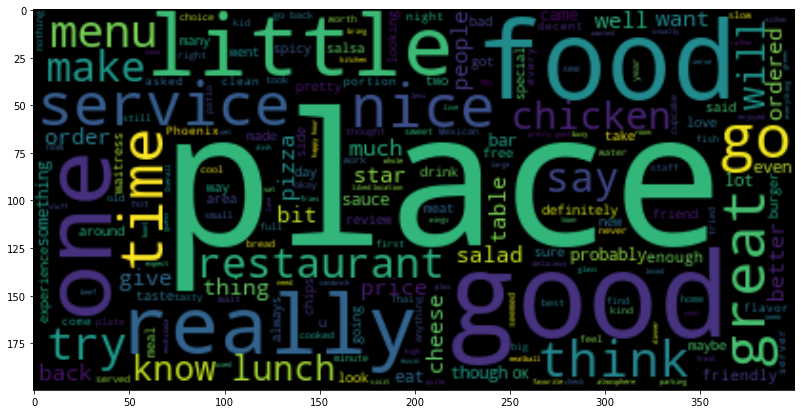

In [36]:
#creating a word cloud of the data
num_stars = 3
this_star_text = '' #creates empty string for all the data
for t in yelp[yelp['stars'] == num_stars]['text'].values: 
    this_star_text += t + ' '
    
wordcloud = WordCloud()    
wordcloud.generate_from_text(this_star_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')

In [37]:
#based on the word cloud it is evident that not all the words will help us distinguish between the stars (like menu or back or try)
#need to tokenize the data in order to only leave special words
#tokenizing the library using the NLKT toolkit
sampleTokenize = 'I had a lot of fun at the grocery store since everyone was very nice'
tokens = word_tokenize(sampleTokenize)
tokens

['I',
 'had',
 'a',
 'lot',
 'of',
 'fun',
 'at',
 'the',
 'grocery',
 'store',
 'since',
 'everyone',
 'was',
 'very',
 'nice']

In [38]:
#stopwords: don't convey a message are simply filler words 
isStopWord = 'because'
if isStopWord.lower() in STOP_WORDS: #part of the NLTK library
    print(isStopWord + ' is a stop word')
else:
    print(isStopWord + ' is NOT a stop word')

because is a stop word


In [39]:
#using the spacy library
nlp = en_core_web_md.load()
doc = nlp(u"Hi there! We do not have enough time. Can you quicken your pace?")
doc
token = doc[0] #first word of the text
assert token.text == u"Hi"
assert len(token) == 2

print(len(token.text))

2


In [40]:
#creating a word vector (helps determine similarities between various words)
doc = nlp(u"I like apples")
apples = doc[2]
print (apples.vector)

[-0.6334     0.18981   -0.53544   -0.52658   -0.30001    0.30559
 -0.49303    0.14636    0.012273   0.96802    0.0040354  0.25234
 -0.29864   -0.014646  -0.24905   -0.67125   -0.053366   0.59426
 -0.068034   0.10315    0.66759    0.024617  -0.37548    0.52557
  0.054449  -0.36748   -0.28013    0.090898  -0.025687  -0.5947
 -0.24269    0.28603    0.686      0.29737    0.30422    0.69032
  0.042784   0.023701  -0.57165    0.70581   -0.20813   -0.03204
 -0.12494   -0.42933    0.31271    0.30352    0.09421   -0.15493
  0.071356   0.15022   -0.41792    0.066394  -0.034546  -0.45772
  0.57177   -0.82755   -0.27885    0.71801   -0.12425    0.18551
  0.41342   -0.53997    0.55864   -0.015805  -0.1074    -0.29981
 -0.17271    0.27066    0.043996   0.60107   -0.353      0.6831
  0.20703    0.12068    0.24852   -0.15605    0.25812    0.007004
 -0.10741   -0.097053   0.085628   0.096307   0.20857   -0.23338
 -0.077905  -0.030906   1.0494     0.55368   -0.10703    0.052234
  0.43407   -0.13926    0

In [41]:
#using the word vector you can determine the similarities between words
doc = nlp(u"Mercedes and Porsche")#spacy uses 'u' in order to declare a "document"
word1 = doc[0]
word2 = doc[2]
word1.similarity(word2)

0.7058761

In [42]:
#for demo reasons need to remove all reviews with 4 stars
yelp = yelp[yelp.stars != 4] # new yelp is equal to everything without 4 stars

In [43]:
def is_good_review(stars):
    if stars> 3:
        return True
    else:
        return False
yelp['is_good_review'] = yelp['stars'].apply(is_good_review)
yelp.head(25)

,stars,text,cool,useful,funny,is_good_review
0,5,My wife took me here on my birthday for breakf...,2,5,0,True
1,5,I have no idea why some people give bad review...,0,0,0,True
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,True
3,5,General Manager Scott Petello is a good egg!!!...,0,0,0,True
4,5,Drop what you're doing and drive here. After I...,7,7,4,True
5,5,Nobuo shows his unique talents with everything...,0,1,0,True
6,5,The oldish man who owns the store is as sweet ...,1,3,1,True
7,5,Wonderful Vietnamese sandwich shoppe. Their ba...,1,1,0,True
8,5,They have a limited time thing going on right ...,1,2,0,True
9,5,okay this is the best place EVER! i grew up sh...,0,0,0,True


In [44]:
#one-hot encoding
print('{:^5}|{:^5}|{:^4}|{:^4}|{:^10}'.format('great', 'tacos', 'at','this','restaurant'))
print('--------------------------------------------')
print('{:^5}|{:^5}|{:^4}|{:^4}|{:^10}'.format('1', '0', '0','0','0'))
print('{:^5}|{:^5}|{:^4}|{:^4}|{:^10}'.format('0', '1', '0','0','0'))
print('{:^5}|{:^5}|{:^4}|{:^4}|{:^10}'.format('0', '0', '1','0','0'))
print('{:^5}|{:^5}|{:^4}|{:^4}|{:^10}'.format('0', '0', '0','1','0'))
print('{:^5}|{:^5}|{:^4}|{:^4}|{:^10}'.format('0', '0', '0','0','1'))

great|tacos| at |this|restaurant
--------------------------------------------
  1  |  0  | 0  | 0  |    0     
  0  |  1  | 0  | 0  |    0     
  0  |  0  | 1  | 0  |    0     
  0  |  0  | 0  | 1  |    0     
  0  |  0  | 0  | 0  |    1     


In [50]:
def tokenize(text):
    clean_tokens = []
    for token in nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these 
            clean_tokens.append(token.lemma_)
    return clean_tokens
X = yelp['text']
y = yelp['is_good_review']
X.shape, y.shape
bow_transformer = CountVectorizer(analyzer=tokenize, max_features=800).fit(X)
#CountVectorizer: scikit-learn: creates object that helps preprocess raw text
bow_transformer.vocabulary_ 
#line above generates all the common vocab (commented to save space)
#you can also organize by the entity:
# https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/


{'wife': 781,
 'take': 705,
 'birthday': 105,
 'breakfast': 121,
 'excellent': 271,
 ' ': 2,
 'perfect': 526,
 'sit': 644,
 'outside': 506,
 'waitress': 763,
 'food': 308,
 'arrive': 67,
 'quickly': 573,
 'busy': 132,
 'Saturday': 41,
 'morning': 469,
 'look': 423,
 'like': 411,
 'place': 538,
 'fill': 297,
 'pretty': 561,
 'early': 253,
 'well': 778,
 '\n\n': 1,
 'simply': 642,
 'good': 331,
 'sure': 699,
 'use': 748,
 'ingredient': 382,
 'fresh': 313,
 'order': 504,
 'amazing': 59,
 'menu': 454,
 'white': 780,
 'egg': 258,
 'vegetable': 754,
 'tasty': 708,
 'delicious': 226,
 'come': 176,
 '2': 13,
 'piece': 536,
 'bread': 119,
 'absolutely': 50,
 'meal': 447,
 'toast': 723,
 'wait': 761,
 'idea': 375,
 'people': 524,
 'bad': 84,
 'review': 594,
 'go': 330,
 'probably': 563,
 'case': 143,
 'friend': 314,
 'past': 519,
 'Sunday': 43,
 'crowded': 205,
 'think': 717,
 'evening': 268,
 'seat': 617,
 'say': 613,
 'girl': 325,
 'waiter': 762,
 'get': 323,
 'drink': 249,
 'pleasant': 543,
 

In [51]:
len(bow_transformer.vocabulary_)

800

In [52]:
X = bow_transformer.transform(X)


In [56]:
#import logistic regression model
logistic_model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [57]:
#training the model
logistic_model.fit(X_train, y_train)

LogisticRegression()